In [4]:
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
import iaml01cw2_helpers

In [5]:
Xtrn, Ytrn, Xtst, Ytst = iaml01cw2_helpers.load_CoVoST2('data')

In [363]:
# Q3.1
def iaml01cw2_q3_1(Xtrn):
    Kmeans=KMeans(n_clusters=22,random_state=1).fit(Xtrn)
    Clu_class=Kmeans.predict(Xtrn)
    sum_dis=[]
    for i in np.arange(0,22,1):
        n=Xtrn[np.where(Clu_class==i),i]
        print("sample number of cluster %i is %d" %(i,n.size))
    sum_dis=Kmeans.inertia_
    print(sum_dis)
    return Kmeans
Kmeans=iaml01cw2_q3_1(Xtrn)

sample number of cluster 0 is 1018
sample number of cluster 1 is 1125
sample number of cluster 2 is 1191
sample number of cluster 3 is 890
sample number of cluster 4 is 1162
sample number of cluster 5 is 1332
sample number of cluster 6 is 839
sample number of cluster 7 is 623
sample number of cluster 8 is 1400
sample number of cluster 9 is 838
sample number of cluster 10 is 659
sample number of cluster 11 is 1276
sample number of cluster 12 is 121
sample number of cluster 13 is 152
sample number of cluster 14 is 950
sample number of cluster 15 is 1971
sample number of cluster 16 is 1251
sample number of cluster 17 is 845
sample number of cluster 18 is 896
sample number of cluster 19 is 930
sample number of cluster 20 is 1065
sample number of cluster 21 is 1466
38185.816951386696


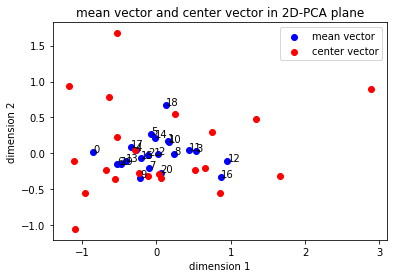

In [365]:
#3.2
def iaml01cw2_q3_2(Xtrn,Ytrn):
    clu_center=Kmeans.cluster_centers_
    mean_vector=[]
    for i in np.arange(0,22,1):
        mean=np.mean(Xtrn[np.where(Ytrn==i),:],axis=1)
        mean_vector.append(mean)
    mean_vector=np.array(mean_vector).ravel().reshape(22,26)
    pca=PCA(n_components=2).fit(mean_vector)
    mean_2d=pca.transform(mean_vector)
    center_2d=pca.transform(clu_center)
    plt.scatter(mean_2d[:,0],mean_2d[:,1],c='blue',label='mean vector')
    for i in np.arange(0,22,1):
        plt.annotate(i,[mean_2d[i,0],mean_2d[i,1]])
    plt.scatter(center_2d[:,0],center_2d[:,1],c='red',label='center vector')
    plt.legend()
    plt.title('mean vector and center vector in 2D-PCA plane')
    plt.ylabel('dimension 2')
    plt.xlabel('dimension 1')
    return mean_vector
mean_vector=iaml01cw2_q3_2(Xtrn,Ytrn)

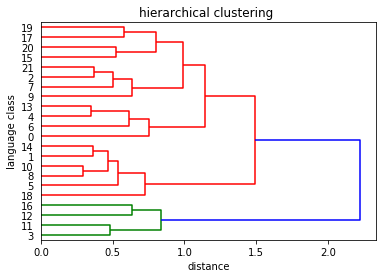

In [50]:
#3.3
def iaml01cw2_q3_3(mean_vector):
    Z=linkage(mean_vector,'ward')
    dendrogram(Z, orientation='right')
    plt.title('hierarchical clustering ')
    plt.ylabel('language class')
    plt.xlabel('distance')
iaml01cw2_q3_3(mean_vector)

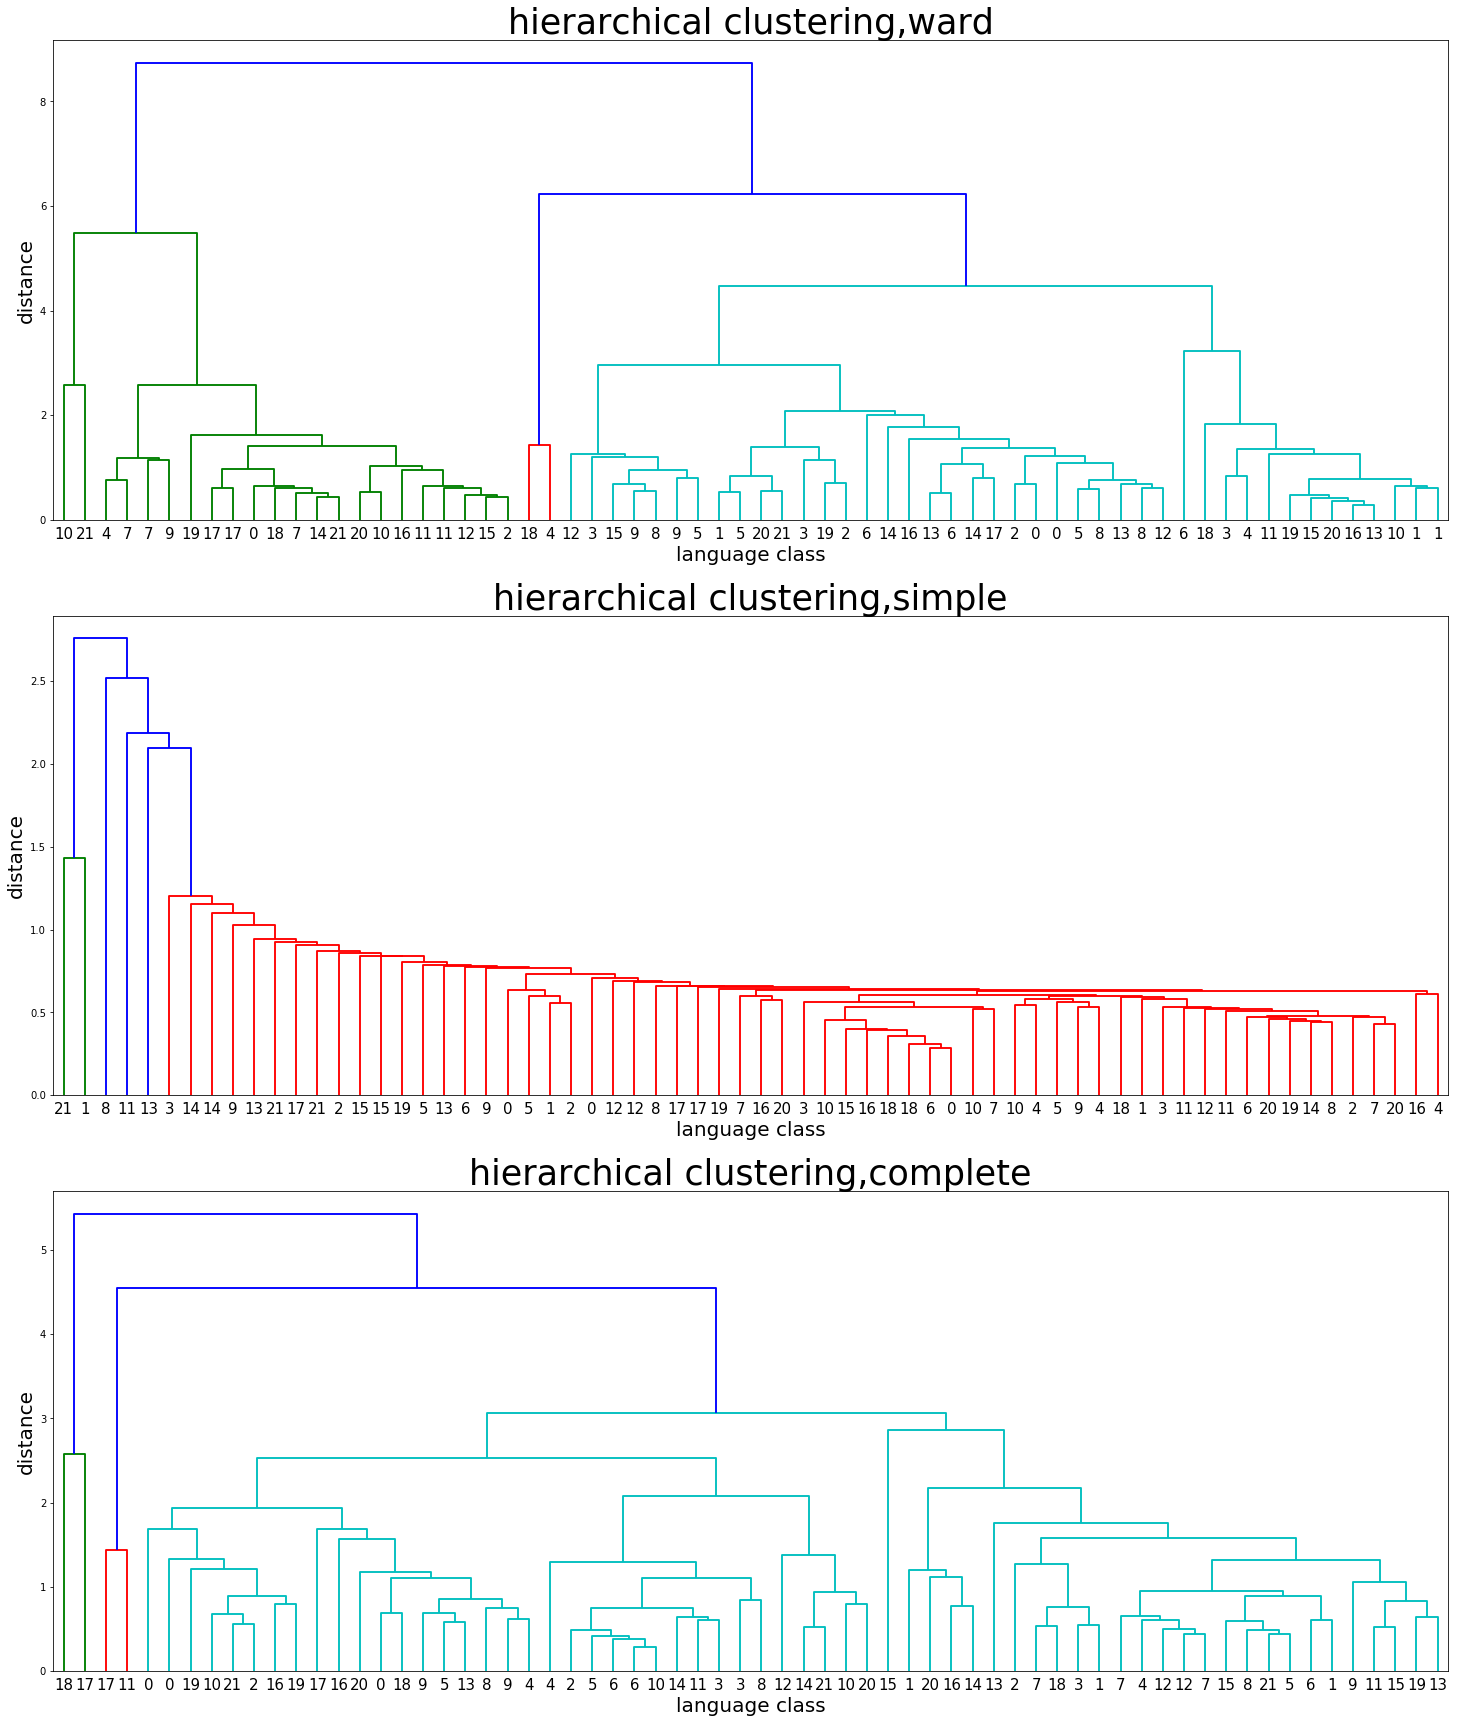

In [111]:
#3.4
def iaml01cw2_q3_4(Xtrn,Ytrn):
    all_center=[]
    for i in np.arange(0,22,1):
        Xn=Xtrn[np.where(Ytrn==i),:]
        kmeans=KMeans(n_clusters=3,random_state=1).fit(Xn[0])
        clu_center=kmeans.cluster_centers_
        all_center.append(clu_center)
    all_center=np.array(all_center).reshape(66,26)
    Z_ward=linkage(all_center,'ward')
    Z_single=linkage(all_center,'single')
    Z_complete=linkage(all_center,'complete')

    plt.figure(figsize=(25,30))
    plt.subplot(3, 1 ,1)
    hc=dendrogram(Z_ward)
    label=list(hc.values())
    label=np.mod(np.array(label[3]),22)
    dendrogram(Z_ward,labels=label)
    plt.title('hierarchical clustering,ward',fontsize=35)
    plt.xlabel('language class',fontsize=20)
    plt.ylabel('distance',fontsize=20)
    plt.xticks(fontsize=15,rotation=0)

    plt.subplot(3, 1 ,2)
    hc=dendrogram(Z_single)
    label=list(hc.values())
    label=np.mod(np.array(label[3]),22)
    dendrogram(Z_single,labels=label)
    plt.title('hierarchical clustering,simple',fontsize=35)
    plt.xlabel('language class',fontsize=20)
    plt.ylabel('distance',fontsize=20)
    plt.xticks(fontsize=15,rotation=0)

    plt.subplot(3, 1 ,3)
    hc=dendrogram(Z_complete)
    label=list(hc.values())
    label=np.mod(np.array(label[3]),22)
    dendrogram(Z_complete,labels=label)
    plt.title('hierarchical clustering,complete',fontsize=35)
    plt.xlabel('language class',fontsize=20)
    plt.ylabel('distance',fontsize=20)
    plt.xticks(fontsize=15,rotation=0)
    plt.show()
iaml01cw2_q3_4(Xtrn,Ytrn)

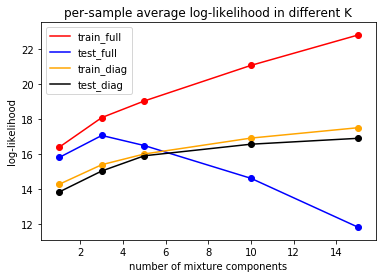

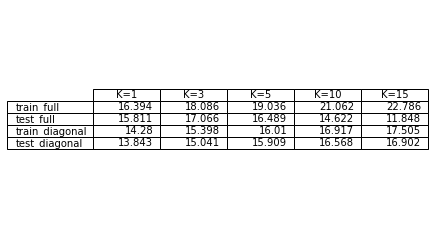

In [354]:
#3.5
def iaml01cw2_q3_5(Xtrn, Ytrn, Xtst, Ytst):
    lan0_trn=Xtrn[np.array(np.where(Ytrn==0)),:].reshape(1001,26)
    lan0_tst=Xtst[np.array(np.where(Ytst==0)),:].reshape(103,26)
    K=[1,3,5,10,15]
    likeli_trn=[]
    likeli_tst=[]
    for k in K:
        gmm = GaussianMixture(n_components=k,covariance_type='full',random_state=1).fit(lan0_trn)
        like_trn=gmm.score(lan0_trn)
        like_tst=gmm.score(lan0_tst)
        likeli_trn.append(like_trn)
        likeli_tst.append(like_tst)
    likeli_trn_full=np.array(likeli_trn)
    likeli_tst_full=np.array(likeli_tst)
    likeli_tst=[]
    likeli_trn=[]
    for k in K:
        gmm = GaussianMixture(n_components=k,covariance_type='diag',random_state=1).fit(lan0_trn)
        like_trn=gmm.score(lan0_trn)
        like_tst=gmm.score(lan0_tst)
        likeli_trn.append(like_trn)
        likeli_tst.append(like_tst)
    likeli_trn_diag=np.array(likeli_trn)
    likeli_tst_diag=np.array(likeli_tst)
    GMM_table=np.around(np.vstack((likeli_trn_full,likeli_tst_full,likeli_trn_diag,likeli_tst_diag)),3)
    plt.plot(K,likeli_trn_full,c='red',label='train_full')
    plt.plot(K,likeli_tst_full,c='blue',label='test_full')
    plt.plot(K,likeli_trn_diag,c='orange',label='train_diag')
    plt.plot(K,likeli_tst_diag,c='black',label='test_diag')
    plt.scatter(K,likeli_trn_full,c='red')
    plt.scatter(K,likeli_tst_full,c='blue')
    plt.scatter(K,likeli_trn_diag,c='orange')
    plt.scatter(K,likeli_tst_diag,c='black')
    plt.legend()
    plt.title('per-sample average log-likelihood in different K')
    plt.xlabel('number of mixture components')
    plt.ylabel('log-likelihood')
    plt.figure()
    col= ['K=1','K=3','K=5','K=10','K=15']
    row = ['train_full','test_full','train_diagonal','test_diagonal']
    my_table = plt.table(cellText=GMM_table,rowLabels=row, colLabels=col, loc='center')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    return lan0_trn,lan0_tst,likeli_trn_diag,likeli_tst_diag
lan0_trn,lan0_tst,likeli_trn_diag,likeli_tst_diag=iaml01cw2_q3_5(Xtrn, Ytrn, Xtst, Ytst)

In [345]:
#3.6
def iaml01cw2_q3_6():
    def SimpleGMM_train(X,n_components):
        from sklearn.cluster import KMeans
        covariance_matrix=[]
        weights=[]
        Kmeans=KMeans(n_clusters=n_components,random_state=1).fit(X)
        mean_vectors=Kmeans.cluster_centers_
        k_class=Kmeans.labels_
        N=X.shape[0]
        for i in np.arange(0,n_components,1):
            data_n=X[np.where(k_class==i)]
            weight=data_n.shape[0]/N
            diag_cov=np.var(data_n,axis=0,ddof=1)
            covariance_matrix.append(diag_cov)
            weights.append(weight)
        covariance_matrix=np.array(covariance_matrix)
        weights=np.array(weights)
        return mean_vectors,covariance_matrix,weights
    def SimpleGMM_eval(X,Ms,Dcovs,Pk):
        from scipy.stats import multivariate_normal
        num=Pk.shape[0]
        P=[]
        for n in np.arange(0,num,1):
            Px=multivariate_normal.pdf(X,Ms[n,:],Dcovs[n,:],random_sate=1)
            P_n=Px*Pk[n]
            P.append(P_n)
        P=np.array(P)
        log_average=np.average(np.log(np.sum(P,axis=0)))
        return log_average

In [359]:
#3.7
def iaml01cw2_q3_7():
    K=[1,5,10]
    for k in K:
        m,c,w=SimpleGMM_train(lan0_trn,k)
        print('the weights of mixture components for K=%d is'%(k),w)
    return m,c,w
m,c,w=iaml01cw2_q3_7()

the weights of mixture components for K=1 is [1.]
the weights of mixture components for K=5 is [0.15084915 0.28671329 0.24875125 0.18081918 0.13286713]
the weights of mixture components for K=10 is [0.08991009 0.11288711 0.06493506 0.0999001  0.14285714 0.07092907
 0.1018981  0.07092907 0.11388611 0.13186813]


per sample average log-likelihood on trainning set for K=1 is 14.280411040118192
per sample average log-likelihood on trainning set for K=3 is 15.223027802016802
per sample average log-likelihood on trainning set for K=5 is 15.798088657121905
per sample average log-likelihood on trainning set for K=10 is 16.618881467744423
per sample average log-likelihood on trainning set for K=15 is 17.128452635755167
per sample average log-likelihood on testing set for K=1 is 13.84315530995079
per sample average log-likelihood on testing set for K=3 is 14.967366450627079
per sample average log-likelihood on testing set for K=5 is 15.60178783331116
per sample average log-likelihood on testing set for K=10 is 16.43818891052642
per sample average log-likelihood on testing set for K=15 is 16.55060922367705


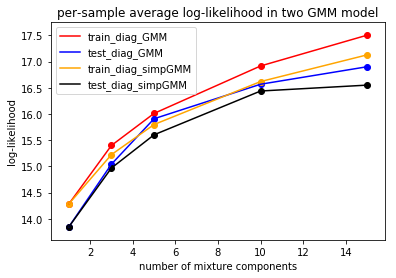

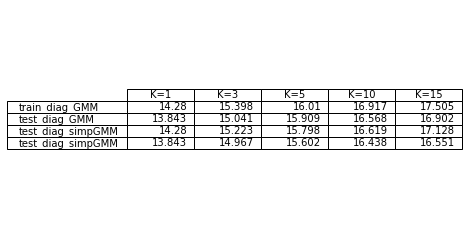

In [362]:
#3.8
def iaml01cw2_q3_8(lan0_trn,lan0_tst,likeli_trn_diag,likeli_tst_diag):
    K=[1,3,5,10,15]
    P_log_trn=[]
    for k in K:
        m,c,w=SimpleGMM_train(lan0_trn,k)
        log_trn=SimpleGMM_eval(lan0_trn,m,c,w)
        P_log_trn.append(log_trn)
        print('per sample average log-likelihood on trainning set for K=%d is'%(k),log_trn)
    P_log_trn=np.array(P_log_trn)
    P_log_tst=[]
    for k in K:
        m,c,w=SimpleGMM_train(lan0_trn,k)
        log_tst=SimpleGMM_eval(lan0_tst,m,c,w)
        P_log_tst.append(log_tst)
        print('per sample average log-likelihood on testing set for K=%d is'%(k),log_tst)
    P_log_tst=np.array(P_log_tst)
    plt.plot(K,likeli_trn_diag,c='red',label='train_diag_GMM')
    plt.plot(K,likeli_tst_diag,c='blue',label='test_diag_GMM')
    plt.plot(K,P_log_trn,c='orange',label='train_diag_simpGMM')
    plt.plot(K,P_log_tst,c='black',label='test_diag_simpGMM')
    plt.scatter(K,likeli_trn_diag,c='red')
    plt.scatter(K,likeli_tst_diag,c='blue')
    plt.scatter(K,P_log_trn,c='orange')
    plt.scatter(K,P_log_tst,c='black')
    plt.legend()
    plt.title('per-sample average log-likelihood in two GMM model')
    plt.xlabel('number of mixture components')
    plt.ylabel('log-likelihood')
    GMM_table=np.around(np.vstack((likeli_trn_diag,likeli_tst_diag,P_log_trn,P_log_tst)),3)
    plt.figure()
    col= ['K=1','K=3','K=5','K=10','K=15']
    row = ['train_diag_GMM','test_diag_GMM','test_diag_simpGMM','test_diag_simpGMM']
    my_table = plt.table(cellText=GMM_table,rowLabels=row, colLabels=col, loc='center')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
iaml01cw2_q3_8(lan0_trn,lan0_tst,likeli_trn_diag,likeli_tst_diag)